Subscribe to DataSciPie https://www.youtube.com/channel/UCClRgdNHjLdlYff86fPq5qw?sub_confirmation=1

#  Multiple Linear Regression

Linear Regression : y=mx+c

Multiple Linear Regression : y = m1  x1 + m2 x2+.... +c

# Step-1-Import necessary Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step-2-Import Data

In [5]:
df = pd.read_csv(r".....\emission_analysis.csv")  #file location

In [7]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Step-3-Data Cleaning

In [17]:
edf=df[['ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [18]:
edf.head()

,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,8.5,196
1,2.4,9.6,221
2,1.5,5.9,136
3,3.5,11.1,255
4,3.5,10.6,244


# Step-4-Train-Test Split 

In [19]:
mask=np.random.rand(len(edf)) <0.8
train=edf[mask]
test=edf[~mask]

In [20]:
edf.index

RangeIndex(start=0, stop=1067, step=1)

In [21]:
train.index

Int64Index([   2,    3,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066],
           dtype='int64', length=832)

In [22]:
test.index

Int64Index([   0,    1,    8,   22,   23,   26,   27,   31,   38,   41,
            ...
            1025, 1029, 1031, 1032, 1035, 1042, 1046, 1049, 1050, 1051],
           dtype='int64', length=235)

# Step-5-Data Visualization

<function matplotlib.pyplot.show(*args, **kw)>

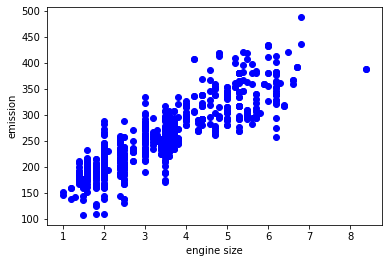

In [23]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('engine size')
plt.ylabel('emission')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

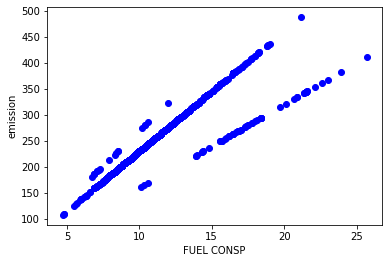

In [25]:
plt.scatter(train.FUELCONSUMPTION_COMB,train.CO2EMISSIONS,color='blue')
plt.xlabel('FUEL CONSP')
plt.ylabel('emission')
plt.show

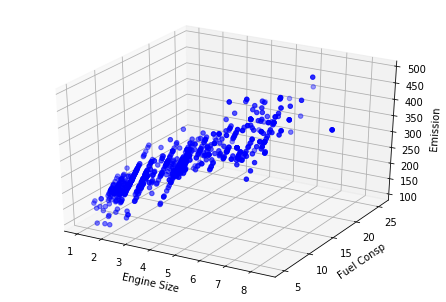

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)

ax.set_xlabel('Engine Size')
ax.set_ylabel('Fuel Consp')
ax.set_zlabel('Emission')
ax.scatter(train.ENGINESIZE,train.FUELCONSUMPTION_COMB,train.CO2EMISSIONS,c='blue')

# Step-6-Creat a Multiple linear regression Model

Linear Regression : y=mx+c

Multiple Linear Regression : y = m1  x1 + m2 x2 +c

In [29]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE','FUELCONSUMPTION_COMB']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x,train_y)
print('intercept:',reg.intercept_)
print('coefficient:',reg.coef_)
#z=18.7*x+10.5*y+72.7

intercept: [72.68846063]
coefficient: [[18.67475476 10.48085485]]


# Step-7-Plot regression Plane

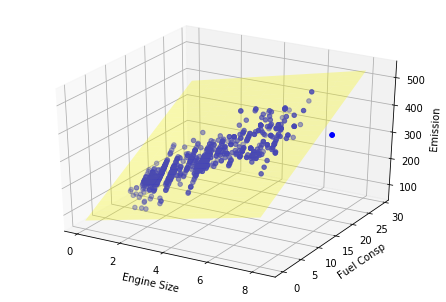

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)

ax.set_xlabel('Engine Size')
ax.set_ylabel('Fuel Consp')
ax.set_zlabel('Emission')
ax.scatter(train.ENGINESIZE,train.FUELCONSUMPTION_COMB,train.CO2EMISSIONS,c='blue')

x,y=np.meshgrid(range(9),range(30))
z=reg.coef_[0][0]*x+reg.coef_[0][1]*y+reg.intercept_
ax.plot_surface(x,y,z,color='yellow',alpha=0.3)

# Step-8-Evaluaion of Model Accuracy

# r2_score
![title](r2.png)

In [39]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE','FUELCONSUMPTION_COMB']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_pred=reg.predict(test_x)
print('r2_score:',r2_score(test_y_pred,test_y))

r2_score: 0.8479833906010951
